In [2]:
import scib
import scanpy as sc
import louvain
import scanorama
import numpy as np
import scvi
import os

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/lightning/fabric/__init__.py:40: Deprecated call to `pkg_resources.declare_namespace('lightning.fabric')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/pkg_resources/__init__.py:2350: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('lightning')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/lightning/pytorch/__init__.py:37: Deprecated call to `pkg_resources.declare_namespace('lightning.pytorch')`.
Implemen

In [88]:
adata=sc.read("/bmbl_data/qiguo/SCI/atlas/integration/output/health_merge_qc_0429.h5ad")

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [62]:
adata

AnnData object with n_obs × n_vars = 95745 × 34905
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Study_name', 'Vendor', 'Strain', 'Mice_number', 'Sex', 'Age', 'Tissue', 'Spinal_cord_removed_level', 'Sample_location_description', 'Condition', 'Meninges_removal', 'Perfusion', 'Spinal_cord_process_workflow', 'Injury_location_.level.', 'Injury_severity', 'Treatment', 'Time_post_injury_.dpi.', 'Cell_type_description', 'Fresh_or_frozen', 'Sequencing_types', 'Dissociation', 'Sequencing_technology', 'Sequencing_platform', 'Cellranger_version', 'Reference_genome', 'Genome_annotation_databases', 'Number_of_cells.spots', 'Number_of_genes', 'Gene_naming_format', 'Cell_type_annotation', 'previous_celltype', 'previous_subcelltype', 'harmonized_majorct', 'purestudy_name', 'harmonized_majorct2', 'unintegrated_clusters', 'seurat_clusters'
    var: 'vf_vst_counts.Popovich_2022_mean', 'vf_vst_counts.Popovich_2022_variance', 'vf_vst_counts.Popovich_2022_variance.expected', 'vf_vst_counts.Popovich_

In [15]:
adata.X = adata.X.astype(float)
#adata.layers['counts'] = adata.X

In [89]:
sc.pp.filter_genes(adata,min_cells=3)
sc.pp.filter_cells(adata, min_genes=200)

In [90]:
adata.layers["counts"] = adata.X.copy()  # preserve counts
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata  # freeze the state in `.raw`

In [92]:
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=2000,
    subset=True,
    layer="counts",
    flavor="seurat_v3",
    batch_key="purestudy_name",
)

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:64: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [93]:
adata

AnnData object with n_obs × n_vars = 95745 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Study_name', 'Vendor', 'Strain', 'Mice_number', 'Sex', 'Age', 'Tissue', 'Spinal_cord_removed_level', 'Sample_location_description', 'Condition', 'Meninges_removal', 'Perfusion', 'Spinal_cord_process_workflow', 'Injury_location_.level.', 'Injury_severity', 'Treatment', 'Time_post_injury_.dpi.', 'Cell_type_description', 'Fresh_or_frozen', 'Sequencing_types', 'Dissociation', 'Sequencing_technology', 'Sequencing_platform', 'Cellranger_version', 'Reference_genome', 'Genome_annotation_databases', 'Number_of_cells.spots', 'Number_of_genes', 'Gene_naming_format', 'Cell_type_annotation', 'previous_celltype', 'previous_subcelltype', 'harmonized_majorct', 'purestudy_name', 'harmonized_majorct2', 'unintegrated_clusters', 'seurat_clusters', 'n_genes'
    var: 'vf_vst_counts.Popovich_2022_mean', 'vf_vst_counts.Popovich_2022_variance', 'vf_vst_counts.Popovich_2022_variance.expected', 'vf_vst_counts

In [95]:
scvi.model.SCVI.setup_anndata(
    adata,
    layer="counts",
    batch_key="purestudy_name"
)

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/data/fields/_layer_field.py:115: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  _verify_and_correct_data_format(adata, self.attr_name, self.attr_key)


In [97]:
model = scvi.model.SCVI(adata)
model.train()

Trainer will use only 1 of 8 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=8)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Epoch 1/84:   0%|          | 0/84 [00:00<?, ?it/s]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 2/84:   1%|          | 1/84 [00:27<37:53, 27.39s/it, v_num=1, train_loss_step=406, train_loss_epoch=438]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 3/84:   2%|▏         | 2/84 [00:55<38:04, 27.86s/it, v_num=1, train_loss_step=389, train_loss_epoch=398]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 4/84:   4%|▎         | 3/84 [01:26<39:24, 29.19s/it, v_num=1, train_loss_step=373, train_loss_epoch=386]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 5/84:   5%|▍         | 4/84 [01:55<38:42, 29.03s/it, v_num=1, train_loss_step=361, train_loss_epoch=379]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 6/84:   6%|▌         | 5/84 [02:26<39:12, 29.78s/it, v_num=1, train_loss_step=370, train_loss_epoch=373]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 7/84:   7%|▋         | 6/84 [02:56<38:53, 29.92s/it, v_num=1, train_loss_step=374, train_loss_epoch=370]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 8/84:   8%|▊         | 7/84 [03:24<37:35, 29.29s/it, v_num=1, train_loss_step=403, train_loss_epoch=367]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 9/84:  10%|▉         | 8/84 [03:52<36:46, 29.04s/it, v_num=1, train_loss_step=367, train_loss_epoch=365]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 10/84:  11%|█         | 9/84 [04:22<36:39, 29.32s/it, v_num=1, train_loss_step=383, train_loss_epoch=364]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 11/84:  12%|█▏        | 10/84 [04:50<35:34, 28.84s/it, v_num=1, train_loss_step=356, train_loss_epoch=362]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 12/84:  13%|█▎        | 11/84 [05:21<36:00, 29.60s/it, v_num=1, train_loss_step=372, train_loss_epoch=362]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 13/84:  14%|█▍        | 12/84 [05:54<36:28, 30.40s/it, v_num=1, train_loss_step=358, train_loss_epoch=361]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 14/84:  15%|█▌        | 13/84 [06:24<36:01, 30.44s/it, v_num=1, train_loss_step=358, train_loss_epoch=360]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 15/84:  17%|█▋        | 14/84 [06:52<34:33, 29.62s/it, v_num=1, train_loss_step=381, train_loss_epoch=360]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 16/84:  18%|█▊        | 15/84 [07:23<34:42, 30.18s/it, v_num=1, train_loss_step=343, train_loss_epoch=360]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 17/84:  19%|█▉        | 16/84 [07:54<34:14, 30.21s/it, v_num=1, train_loss_step=357, train_loss_epoch=359]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 18/84:  20%|██        | 17/84 [08:24<33:46, 30.25s/it, v_num=1, train_loss_step=374, train_loss_epoch=359]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 19/84:  21%|██▏       | 18/84 [08:53<32:49, 29.85s/it, v_num=1, train_loss_step=366, train_loss_epoch=359]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 20/84:  23%|██▎       | 19/84 [09:23<32:28, 29.97s/it, v_num=1, train_loss_step=346, train_loss_epoch=359]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 21/84:  24%|██▍       | 20/84 [09:53<31:53, 29.90s/it, v_num=1, train_loss_step=350, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 22/84:  25%|██▌       | 21/84 [10:24<31:53, 30.37s/it, v_num=1, train_loss_step=373, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 23/84:  26%|██▌       | 22/84 [10:54<31:10, 30.18s/it, v_num=1, train_loss_step=347, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 24/84:  27%|██▋       | 23/84 [11:25<30:58, 30.47s/it, v_num=1, train_loss_step=364, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 25/84:  29%|██▊       | 24/84 [11:57<30:47, 30.78s/it, v_num=1, train_loss_step=344, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 26/84:  30%|██▉       | 25/84 [12:27<30:04, 30.58s/it, v_num=1, train_loss_step=380, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 27/84:  31%|███       | 26/84 [12:54<28:36, 29.60s/it, v_num=1, train_loss_step=341, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 28/84:  32%|███▏      | 27/84 [13:24<28:10, 29.65s/it, v_num=1, train_loss_step=372, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 29/84:  33%|███▎      | 28/84 [13:54<27:41, 29.67s/it, v_num=1, train_loss_step=368, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 30/84:  35%|███▍      | 29/84 [14:24<27:20, 29.82s/it, v_num=1, train_loss_step=351, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 31/84:  36%|███▌      | 30/84 [14:57<27:37, 30.69s/it, v_num=1, train_loss_step=368, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 32/84:  37%|███▋      | 31/84 [15:29<27:32, 31.19s/it, v_num=1, train_loss_step=366, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 33/84:  38%|███▊      | 32/84 [16:01<27:18, 31.50s/it, v_num=1, train_loss_step=348, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 34/84:  39%|███▉      | 33/84 [16:34<26:58, 31.74s/it, v_num=1, train_loss_step=360, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 35/84:  40%|████      | 34/84 [17:05<26:25, 31.71s/it, v_num=1, train_loss_step=361, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 36/84:  42%|████▏     | 35/84 [17:37<25:50, 31.65s/it, v_num=1, train_loss_step=366, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 37/84:  43%|████▎     | 36/84 [18:08<25:15, 31.56s/it, v_num=1, train_loss_step=339, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 38/84:  44%|████▍     | 37/84 [18:40<24:51, 31.73s/it, v_num=1, train_loss_step=358, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 39/84:  45%|████▌     | 38/84 [19:12<24:27, 31.90s/it, v_num=1, train_loss_step=349, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 40/84:  46%|████▋     | 39/84 [19:44<23:47, 31.72s/it, v_num=1, train_loss_step=365, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 41/84:  48%|████▊     | 40/84 [20:14<22:59, 31.36s/it, v_num=1, train_loss_step=353, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 42/84:  49%|████▉     | 41/84 [20:45<22:19, 31.15s/it, v_num=1, train_loss_step=362, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 43/84:  50%|█████     | 42/84 [21:15<21:40, 30.97s/it, v_num=1, train_loss_step=346, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 44/84:  51%|█████     | 43/84 [21:46<21:05, 30.85s/it, v_num=1, train_loss_step=347, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 45/84:  52%|█████▏    | 44/84 [22:18<20:43, 31.10s/it, v_num=1, train_loss_step=366, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 46/84:  54%|█████▎    | 45/84 [22:51<20:37, 31.72s/it, v_num=1, train_loss_step=343, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 47/84:  55%|█████▍    | 46/84 [23:23<20:11, 31.88s/it, v_num=1, train_loss_step=367, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 48/84:  56%|█████▌    | 47/84 [23:56<19:48, 32.12s/it, v_num=1, train_loss_step=346, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 49/84:  57%|█████▋    | 48/84 [24:29<19:28, 32.46s/it, v_num=1, train_loss_step=358, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 50/84:  58%|█████▊    | 49/84 [25:02<18:58, 32.53s/it, v_num=1, train_loss_step=368, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 51/84:  60%|█████▉    | 50/84 [25:32<18:03, 31.85s/it, v_num=1, train_loss_step=335, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 52/84:  61%|██████    | 51/84 [26:03<17:18, 31.48s/it, v_num=1, train_loss_step=374, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 53/84:  62%|██████▏   | 52/84 [26:33<16:33, 31.04s/it, v_num=1, train_loss_step=378, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 54/84:  63%|██████▎   | 53/84 [27:04<16:02, 31.04s/it, v_num=1, train_loss_step=364, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 55/84:  64%|██████▍   | 54/84 [27:34<15:24, 30.80s/it, v_num=1, train_loss_step=365, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 56/84:  65%|██████▌   | 55/84 [28:04<14:50, 30.72s/it, v_num=1, train_loss_step=369, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 57/84:  67%|██████▋   | 56/84 [28:35<14:16, 30.59s/it, v_num=1, train_loss_step=341, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 58/84:  68%|██████▊   | 57/84 [29:04<13:35, 30.21s/it, v_num=1, train_loss_step=360, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 59/84:  69%|██████▉   | 58/84 [29:33<12:58, 29.94s/it, v_num=1, train_loss_step=380, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 60/84:  70%|███████   | 59/84 [30:02<12:22, 29.68s/it, v_num=1, train_loss_step=365, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 61/84:  71%|███████▏  | 60/84 [30:33<11:55, 29.83s/it, v_num=1, train_loss_step=358, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 62/84:  73%|███████▎  | 61/84 [31:03<11:30, 30.00s/it, v_num=1, train_loss_step=386, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 63/84:  74%|███████▍  | 62/84 [31:33<11:01, 30.09s/it, v_num=1, train_loss_step=363, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 64/84:  75%|███████▌  | 63/84 [32:02<10:25, 29.77s/it, v_num=1, train_loss_step=349, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 65/84:  76%|███████▌  | 64/84 [32:33<09:57, 29.90s/it, v_num=1, train_loss_step=360, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 66/84:  77%|███████▋  | 65/84 [33:03<09:29, 29.97s/it, v_num=1, train_loss_step=356, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 67/84:  79%|███████▊  | 66/84 [33:32<08:55, 29.75s/it, v_num=1, train_loss_step=358, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 68/84:  80%|███████▉  | 67/84 [34:02<08:27, 29.87s/it, v_num=1, train_loss_step=362, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 69/84:  81%|████████  | 68/84 [34:34<08:10, 30.63s/it, v_num=1, train_loss_step=378, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 70/84:  82%|████████▏ | 69/84 [35:07<07:50, 31.35s/it, v_num=1, train_loss_step=360, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 71/84:  83%|████████▎ | 70/84 [35:40<07:24, 31.74s/it, v_num=1, train_loss_step=386, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 72/84:  85%|████████▍ | 71/84 [36:09<06:42, 30.96s/it, v_num=1, train_loss_step=366, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 73/84:  86%|████████▌ | 72/84 [36:40<06:09, 30.82s/it, v_num=1, train_loss_step=357, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 74/84:  87%|████████▋ | 73/84 [37:10<05:37, 30.67s/it, v_num=1, train_loss_step=341, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 75/84:  88%|████████▊ | 74/84 [37:39<05:00, 30.04s/it, v_num=1, train_loss_step=371, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 76/84:  89%|████████▉ | 75/84 [38:08<04:28, 29.85s/it, v_num=1, train_loss_step=366, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 77/84:  90%|█████████ | 76/84 [38:39<04:01, 30.13s/it, v_num=1, train_loss_step=369, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 78/84:  92%|█████████▏| 77/84 [39:11<03:34, 30.59s/it, v_num=1, train_loss_step=346, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 79/84:  93%|█████████▎| 78/84 [39:41<03:03, 30.58s/it, v_num=1, train_loss_step=360, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 80/84:  94%|█████████▍| 79/84 [40:12<02:33, 30.62s/it, v_num=1, train_loss_step=350, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 81/84:  95%|█████████▌| 80/84 [40:44<02:04, 31.04s/it, v_num=1, train_loss_step=376, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 82/84:  96%|█████████▋| 81/84 [41:14<01:32, 30.70s/it, v_num=1, train_loss_step=372, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 83/84:  98%|█████████▊| 82/84 [41:40<00:58, 29.33s/it, v_num=1, train_loss_step=362, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 84/84:  99%|█████████▉| 83/84 [42:05<00:28, 28.20s/it, v_num=1, train_loss_step=361, train_loss_epoch=358]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 84/84: 100%|██████████| 84/84 [42:31<00:00, 27.40s/it, v_num=1, train_loss_step=358, train_loss_epoch=358]

`Trainer.fit` stopped: `max_epochs=84` reached.


Epoch 84/84: 100%|██████████| 84/84 [42:31<00:00, 30.37s/it, v_num=1, train_loss_step=358, train_loss_epoch=358]


In [99]:
model_dir = os.path.join("/bmbl_data/qiguo/SCI/atlas/integration/output/", "scvi_model")
model.save(model_dir, overwrite=True)

In [100]:
model = scvi.model.SCVI.load(model_dir, adata=adata)

Trainer will use only 1 of 8 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=8)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.


INFO     File /bmbl_data/qiguo/SCI/atlas/integration/output/scvi_model/model.pt already downloaded                 


/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/data/fields/_layer_field.py:115: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  _verify_and_correct_data_format(adata, self.attr_name, self.attr_key)


In [101]:
SCVI_LATENT_KEY = "X_scVI"
latent = model.get_latent_representation()
adata.obsm[SCVI_LATENT_KEY] = latent

In [102]:
adata.write("/bmbl_data/qiguo/SCI/atlas/integration/output/health_merge_qc_0429_preprocessed.h5ad")

## scANVI

In [108]:
scanvi_model = scvi.model.SCANVI.from_scvi_model(
    model,
    adata=adata, 
    labels_key="harmonized_majorct2",
    unlabeled_category="Unknown",#scANVI can also be used with partially annotated dataset
)
scanvi_model.train(max_epochs=20,n_samples_per_label=100)

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/data/fields/_layer_field.py:115: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  _verify_and_correct_data_format(adata, self.attr_name, self.attr_key)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/data/fields/_layer_field.py:115: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast b

INFO     Training for 20 epochs.                                                                                   


Trainer will use only 1 of 8 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=8)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Epoch 1/20:   0%|          | 0/20 [00:00<?, ?it/s]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 2/20:   5%|▌         | 1/20 [00:40<12:42, 40.11s/it, v_num=1, train_loss_step=362, train_loss_epoch=366]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 3/20:  10%|█         | 2/20 [01:18<11:39, 38.87s/it, v_num=1, train_loss_step=371, train_loss_epoch=353]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 4/20:  15%|█▌        | 3/20 [01:53<10:37, 37.49s/it, v_num=1, train_loss_step=355, train_loss_epoch=352]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 5/20:  20%|██        | 4/20 [02:26<09:28, 35.54s/it, v_num=1, train_loss_step=387, train_loss_epoch=351]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 6/20:  25%|██▌       | 5/20 [02:58<08:36, 34.42s/it, v_num=1, train_loss_step=352, train_loss_epoch=351]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 7/20:  30%|███       | 6/20 [03:31<07:53, 33.81s/it, v_num=1, train_loss_step=368, train_loss_epoch=350]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 8/20:  35%|███▌      | 7/20 [04:04<07:15, 33.53s/it, v_num=1, train_loss_step=368, train_loss_epoch=350]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 9/20:  40%|████      | 8/20 [04:37<06:38, 33.21s/it, v_num=1, train_loss_step=373, train_loss_epoch=350]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 10/20:  45%|████▌     | 9/20 [05:16<06:25, 35.07s/it, v_num=1, train_loss_step=379, train_loss_epoch=350]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 11/20:  50%|█████     | 10/20 [05:53<05:58, 35.88s/it, v_num=1, train_loss_step=353, train_loss_epoch=349]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 12/20:  55%|█████▌    | 11/20 [06:34<05:34, 37.22s/it, v_num=1, train_loss_step=379, train_loss_epoch=349]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 13/20:  60%|██████    | 12/20 [07:15<05:08, 38.53s/it, v_num=1, train_loss_step=361, train_loss_epoch=349]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 14/20:  65%|██████▌   | 13/20 [07:54<04:30, 38.62s/it, v_num=1, train_loss_step=338, train_loss_epoch=349]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 15/20:  70%|███████   | 14/20 [08:31<03:48, 38.16s/it, v_num=1, train_loss_step=365, train_loss_epoch=349]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 16/20:  75%|███████▌  | 15/20 [09:08<03:08, 37.79s/it, v_num=1, train_loss_step=337, train_loss_epoch=349]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 17/20:  80%|████████  | 16/20 [09:44<02:29, 37.35s/it, v_num=1, train_loss_step=352, train_loss_epoch=349]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 18/20:  85%|████████▌ | 17/20 [10:23<01:52, 37.66s/it, v_num=1, train_loss_step=337, train_loss_epoch=349]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 19/20:  90%|█████████ | 18/20 [11:02<01:16, 38.19s/it, v_num=1, train_loss_step=346, train_loss_epoch=349]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 20/20:  95%|█████████▌| 19/20 [11:41<00:38, 38.30s/it, v_num=1, train_loss_step=354, train_loss_epoch=349]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scvi/module/_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 20/20: 100%|██████████| 20/20 [12:19<00:00, 38.37s/it, v_num=1, train_loss_step=371, train_loss_epoch=350]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 20/20: 100%|██████████| 20/20 [12:19<00:00, 36.99s/it, v_num=1, train_loss_step=371, train_loss_epoch=350]


In [109]:
scanvimodel_dir = os.path.join("/bmbl_data/qiguo/SCI/atlas/integration/output/", "scanvi_model")
scanvi_model.save(scanvimodel_dir, overwrite=True)

In [110]:
SCANVI_LATENT_KEY = "X_scANVI"
adata.obsm[SCANVI_LATENT_KEY] = scanvi_model.get_latent_representation()
adata.write("/bmbl_data/qiguo/SCI/atlas/integration/output/health_merge_qc_0429_preprocessed.h5ad")

In [111]:
adata

AnnData object with n_obs × n_vars = 95745 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Study_name', 'Vendor', 'Strain', 'Mice_number', 'Sex', 'Age', 'Tissue', 'Spinal_cord_removed_level', 'Sample_location_description', 'Condition', 'Meninges_removal', 'Perfusion', 'Spinal_cord_process_workflow', 'Injury_location_.level.', 'Injury_severity', 'Treatment', 'Time_post_injury_.dpi.', 'Cell_type_description', 'Fresh_or_frozen', 'Sequencing_types', 'Dissociation', 'Sequencing_technology', 'Sequencing_platform', 'Cellranger_version', 'Reference_genome', 'Genome_annotation_databases', 'Number_of_cells.spots', 'Number_of_genes', 'Gene_naming_format', 'Cell_type_annotation', 'previous_celltype', 'previous_subcelltype', 'harmonized_majorct', 'purestudy_name', 'harmonized_majorct2', 'unintegrated_clusters', 'seurat_clusters', 'n_genes', '_scvi_batch', '_scvi_labels'
    var: 'vf_vst_counts.Popovich_2022_mean', 'vf_vst_counts.Popovich_2022_variance', 'vf_vst_counts.Popovich_2022_var

## scanorama

In [78]:
adata=scib.ig.scanorama(adata, batch="purestudy_name")

Found 2000 genes among all datasets
[[0.         0.11645079 0.02816901 0.14647137 0.1014405  0.0159787
  0.32351275 0.00185014 0.05977383 0.25556507]
 [0.         0.         0.26760563 0.10697899 0.00141312 0.00198788
  0.43286119 0.12627197 0.29886914 0.21832192]
 [0.         0.         0.         0.02347418 0.01408451 0.00704225
  0.11502347 0.         0.10093897 0.05633803]
 [0.         0.         0.         0.         0.02785157 0.00491025
  0.29065156 0.27890842 0.06138934 0.09888699]
 [0.         0.         0.         0.         0.         0.45721318
  0.01133144 0.         0.01130856 0.02996575]
 [0.         0.         0.         0.         0.         0.
  0.09971671 0.         0.00969305 0.02268836]
 [0.         0.         0.         0.         0.         0.
  0.         0.10991501 0.20193861 0.25299658]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.1631664  0.00941781]
 [0.         0.         0.         0.         0.         0.
  0.     

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scib/utils.py:72: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  return anndata.AnnData.concatenate(*adata_list, **kwargs)
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [79]:
if np.array_equal(adata.obsm["X_scanorama"], adata.obsm["X_emb"]):
    print("The arrays are identical.")
else:
    print("The arrays are not identical.")

The arrays are identical.


## Visualization using umap

In [3]:
#Macrophage markers
adata=sc.read("/bmbl_data/qiguo/SCI/atlas/integration/output/health_merge_qc_0429_preprocessed.h5ad")

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [3]:
adata

AnnData object with n_obs × n_vars = 95745 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Study_name', 'Vendor', 'Strain', 'Mice_number', 'Sex', 'Age', 'Tissue', 'Spinal_cord_removed_level', 'Sample_location_description', 'Condition', 'Meninges_removal', 'Perfusion', 'Spinal_cord_process_workflow', 'Injury_location_.level.', 'Injury_severity', 'Treatment', 'Time_post_injury_.dpi.', 'Cell_type_description', 'Fresh_or_frozen', 'Sequencing_types', 'Dissociation', 'Sequencing_technology', 'Sequencing_platform', 'Cellranger_version', 'Reference_genome', 'Genome_annotation_databases', 'Number_of_cells.spots', 'Number_of_genes', 'Gene_naming_format', 'Cell_type_annotation', 'previous_celltype', 'previous_subcelltype', 'harmonized_majorct', 'purestudy_name', 'harmonized_majorct2', 'unintegrated_clusters', 'seurat_clusters', 'n_genes', '_scvi_batch', '_scvi_labels'
    var: 'vf_vst_counts.Popovich_2022_mean', 'vf_vst_counts.Popovich_2022_variance', 'vf_vst_counts.Popovich_2022_var

In [4]:
sc.pp.neighbors(adata, use_rep="X_scANVI")
sc.tl.umap(adata, min_dist=0.3)

In [39]:
sc.tl.umap(adata, min_dist=0.2)

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


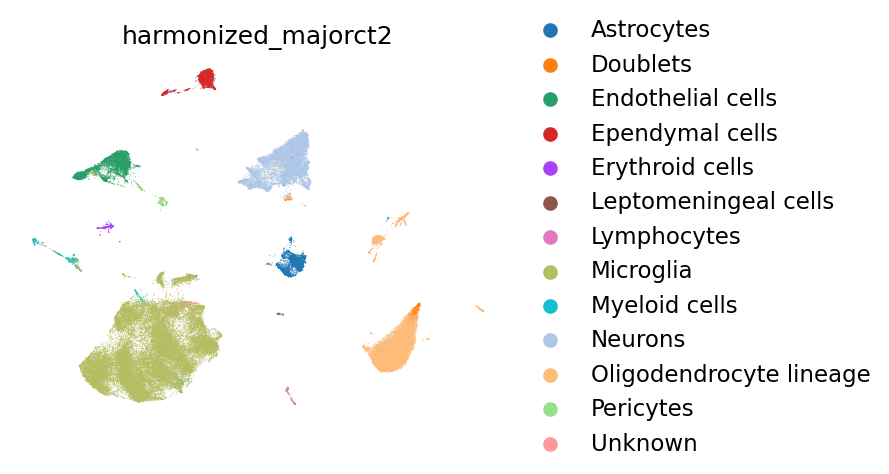

In [38]:
sc.pl.umap(
    adata,
    color=["harmonized_majorct2"],
    frameon=False,
)

In [5]:
sc.pp.neighbors(adata, use_rep="X_scANVI")
sc.tl.umap(adata, min_dist=0.1)

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


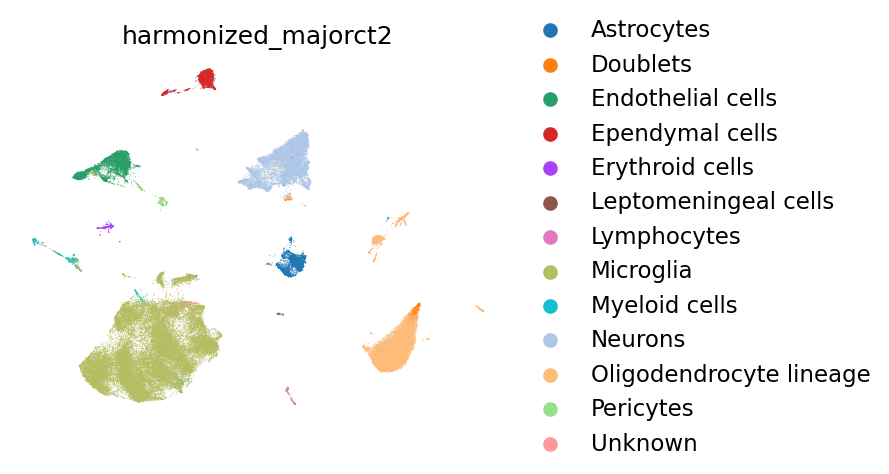

In [6]:
sc.pl.umap(
    adata,
    color=["harmonized_majorct2"],
    frameon=False,
)

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


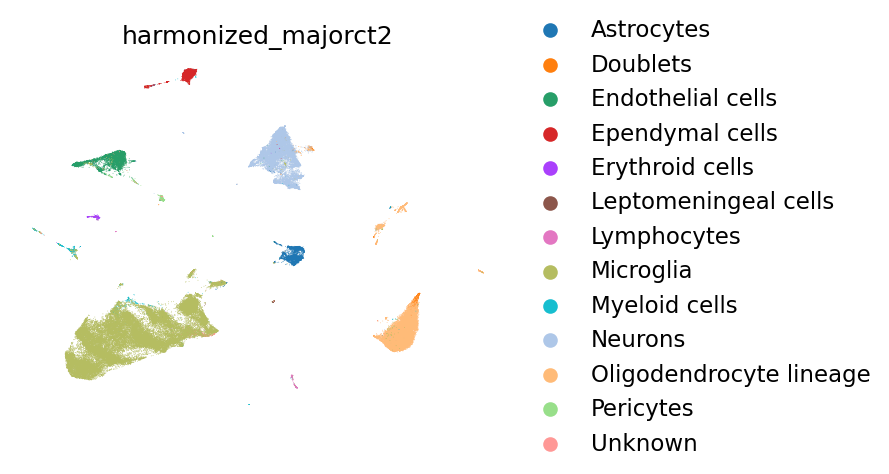

In [8]:
sc.tl.umap(adata, min_dist=0.01)
sc.pl.umap(
    adata,
    color=["harmonized_majorct2"],
    frameon=False,
)

In [10]:
sc.tl.tsne(adata)
sc.pl.tsne(
    adata,
    color=["harmonized_majorct2"],
    frameon=False,
)

: 

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


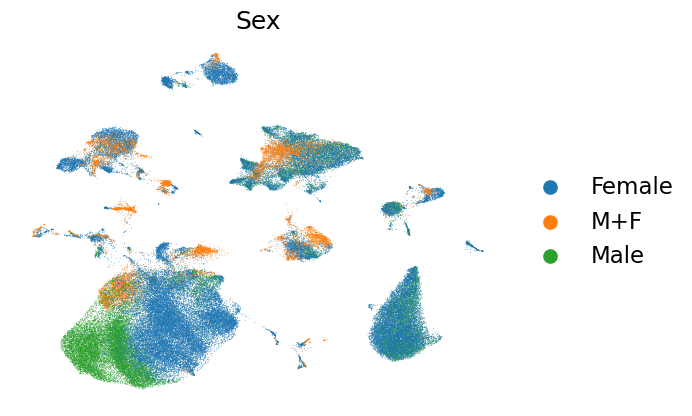

In [9]:
sc.pl.umap(
    adata,
    color=["Sex"],
    frameon=False,
)

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


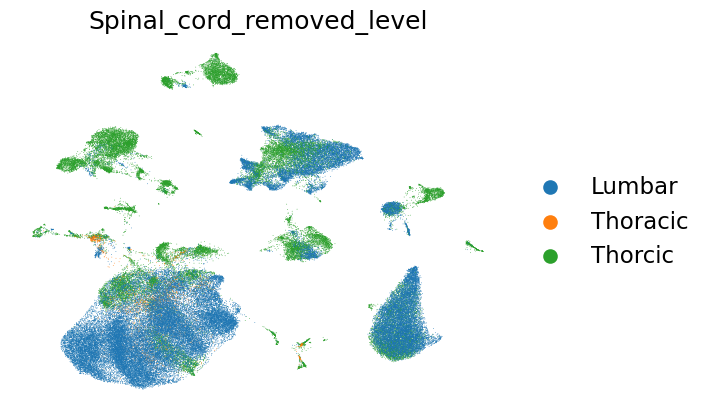

In [11]:
sc.pl.umap(
    adata,
    color=["Spinal_cord_removed_level"],
    frameon=False,
)

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


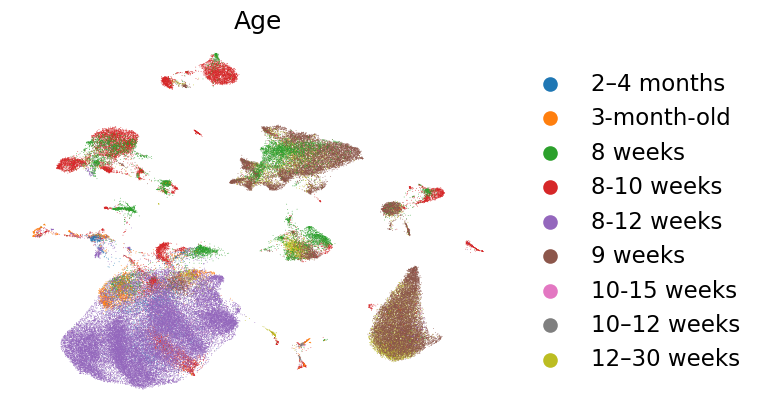

In [10]:
sc.pl.umap(
    adata,
    color=["Age"],
    frameon=False,
)

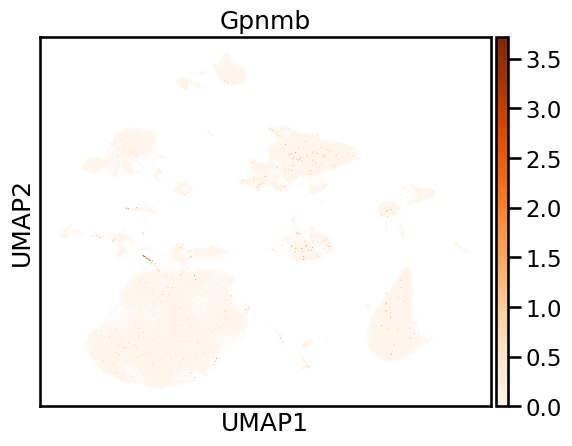

In [8]:
figure = sc.pl.umap(adata, color="Gpnmb",cmap="Oranges")

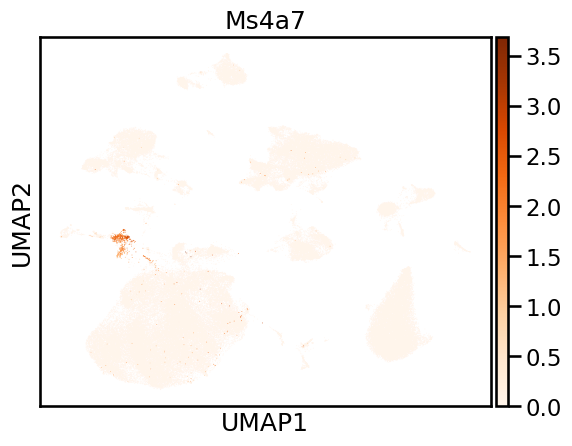

In [31]:
figure = sc.pl.umap(adata, color="Ms4a7",cmap="Oranges")

In [ ]:
figure = sc.pl.umap(adata, color="Ms4a7",cmap="Oranges")

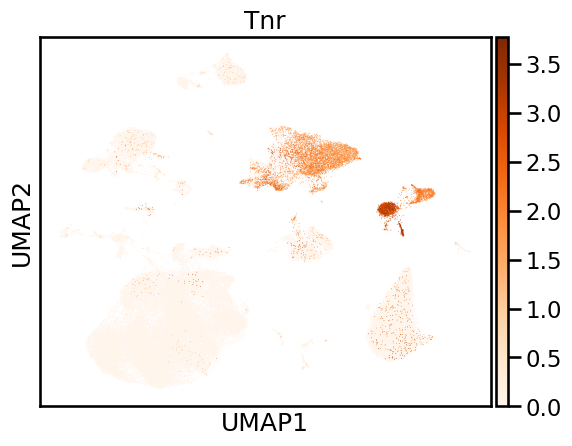

In [36]:
figure = sc.pl.umap(adata, color="Tnr",cmap="Oranges")

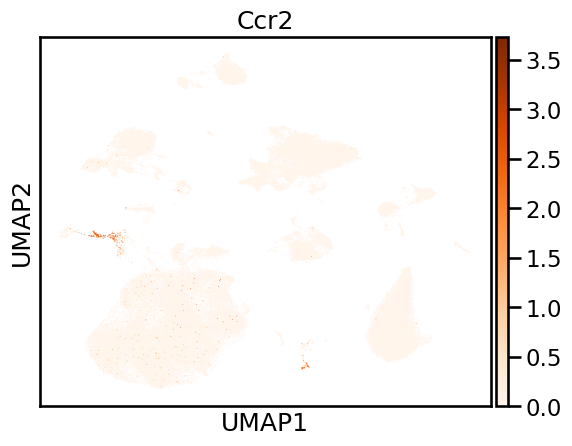

In [32]:
figure = sc.pl.umap(adata, color="Ccr2",cmap="Oranges")

In [13]:
adata_subset = adata[adata.obs['harmonized_majorct2'].isin(['Microglia'])]

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


In [25]:
sc.pp.highly_variable_genes(
    adata_subset,
    n_top_genes=2000,
    subset=True,
    layer="counts",
    flavor="seurat_v3",
    batch_key="purestudy_name",
)

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:64: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:151: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": "seurat_v3"}


In [24]:
adata_subset.raw.X.shape

(46150, 32639)

In [16]:
adata_subset

View of AnnData object with n_obs × n_vars = 46150 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Study_name', 'Vendor', 'Strain', 'Mice_number', 'Sex', 'Age', 'Tissue', 'Spinal_cord_removed_level', 'Sample_location_description', 'Condition', 'Meninges_removal', 'Perfusion', 'Spinal_cord_process_workflow', 'Injury_location_.level.', 'Injury_severity', 'Treatment', 'Time_post_injury_.dpi.', 'Cell_type_description', 'Fresh_or_frozen', 'Sequencing_types', 'Dissociation', 'Sequencing_technology', 'Sequencing_platform', 'Cellranger_version', 'Reference_genome', 'Genome_annotation_databases', 'Number_of_cells.spots', 'Number_of_genes', 'Gene_naming_format', 'Cell_type_annotation', 'previous_celltype', 'previous_subcelltype', 'harmonized_majorct', 'purestudy_name', 'harmonized_majorct2', 'unintegrated_clusters', 'seurat_clusters', 'n_genes', '_scvi_batch', '_scvi_labels'
    var: 'vf_vst_counts.Popovich_2022_mean', 'vf_vst_counts.Popovich_2022_variance', 'vf_vst_counts.Popovich_

In [26]:
scib.metrics.pcr(adata_subset,covariate="purestudy_name")

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


0.37897416913569404

In [27]:
scib.metrics.pcr(adata_subset,covariate="Spinal_cord_removed_level")

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


0.1369491967912783

In [28]:
scib.metrics.pcr(adata_subset,covariate="Strain")

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


0.2918199089573332

In [29]:
scib.metrics.pcr(adata_subset,covariate="Age")

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


0.3673172475122344

In [40]:
scib.metrics.pcr(adata_subset,covariate="Sex")

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


0.13564258047191996

In [44]:
adata_myeloid = adata[adata.obs['harmonized_majorct2'].isin(['Myeloid cells'])]
adata_myeloid

/home/qiguo/.conda/envs/qi/envs/scvi-env/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


View of AnnData object with n_obs × n_vars = 1368 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Study_name', 'Vendor', 'Strain', 'Mice_number', 'Sex', 'Age', 'Tissue', 'Spinal_cord_removed_level', 'Sample_location_description', 'Condition', 'Meninges_removal', 'Perfusion', 'Spinal_cord_process_workflow', 'Injury_location_.level.', 'Injury_severity', 'Treatment', 'Time_post_injury_.dpi.', 'Cell_type_description', 'Fresh_or_frozen', 'Sequencing_types', 'Dissociation', 'Sequencing_technology', 'Sequencing_platform', 'Cellranger_version', 'Reference_genome', 'Genome_annotation_databases', 'Number_of_cells.spots', 'Number_of_genes', 'Gene_naming_format', 'Cell_type_annotation', 'previous_celltype', 'previous_subcelltype', 'harmonized_majorct', 'purestudy_name', 'harmonized_majorct2', 'unintegrated_clusters', 'seurat_clusters', 'n_genes', '_scvi_batch', '_scvi_labels'
    var: 'vf_vst_counts.Popovich_2022_mean', 'vf_vst_counts.Popovich_2022_variance', 'vf_vst_counts.Popovich_2

In [47]:
adata_subset

AnnData object with n_obs × n_vars = 46150 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Study_name', 'Vendor', 'Strain', 'Mice_number', 'Sex', 'Age', 'Tissue', 'Spinal_cord_removed_level', 'Sample_location_description', 'Condition', 'Meninges_removal', 'Perfusion', 'Spinal_cord_process_workflow', 'Injury_location_.level.', 'Injury_severity', 'Treatment', 'Time_post_injury_.dpi.', 'Cell_type_description', 'Fresh_or_frozen', 'Sequencing_types', 'Dissociation', 'Sequencing_technology', 'Sequencing_platform', 'Cellranger_version', 'Reference_genome', 'Genome_annotation_databases', 'Number_of_cells.spots', 'Number_of_genes', 'Gene_naming_format', 'Cell_type_annotation', 'previous_celltype', 'previous_subcelltype', 'harmonized_majorct', 'purestudy_name', 'harmonized_majorct2', 'unintegrated_clusters', 'seurat_clusters', 'n_genes', '_scvi_batch', '_scvi_labels'
    var: 'vf_vst_counts.Popovich_2022_mean', 'vf_vst_counts.Popovich_2022_variance', 'vf_vst_counts.Popovich_2022_var

In [48]:
46150/95745

0.4820095044127631